In [2]:
import numpy as np
import pandas as pd

movie= pd.read_csv('../data_web_data/04_movie_raw_data_user.csv', index_col=0)
movie.head()

,date,name,point
0,2017-12-01,뷰티풀 투모로우,9.36
1,2017-12-01,아이 캔 스피크,9.34
2,2017-12-01,다시 태어나도 우리,9.32
3,2017-12-01,록키,9.31
4,2017-12-01,저수지 게임,9.29


In [3]:
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)        # 자동으로 unique가 되는건가?
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head(10)

,point
name,
러빙 빈센트,919.11
내 사랑,898.76
라라랜드,799.76
위대한 쇼맨,762.83
뽀로로 극장판 공룡섬 대모험,715.68
너의 췌장을 먹고 싶어,694.91
원더,667.68
1987,666.97
신과함께-죄와 벌,649.34


In [4]:
tmp = movie.query('name == ["1987"]')
tmp

,date,name,point
1253,2017-12-27,1987,9.15
1297,2017-12-28,1987,9.20
1345,2017-12-29,1987,9.19
1393,2017-12-30,1987,9.21
1440,2017-12-31,1987,9.23
...,...,...,...
3943,2018-03-05,1987,9.26
3993,2018-03-06,1987,9.26
4043,2018-03-07,1987,9.26
4093,2018-03-08,1987,9.26


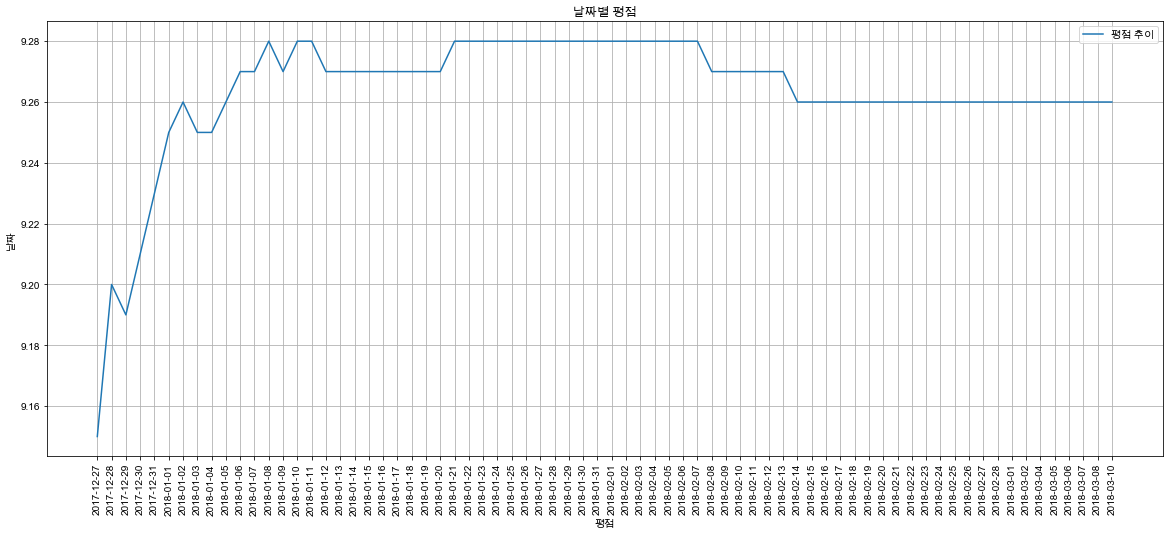

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Arial Unicode MS')
%matplotlib inline

plt.figure(figsize=(20,8))
plt.plot(tmp['date'], tmp['point'])
plt.title('날짜별 평점')
plt.xlabel('평점')
plt.ylabel('날짜')
plt.xticks(rotation='vertical')
plt.legend(labels=['평점 추이'], loc='best')
plt.grid(True)
plt.show()

In [6]:
movie_best.head(10)

,point
name,
러빙 빈센트,919.11
내 사랑,898.76
라라랜드,799.76
위대한 쇼맨,762.83
뽀로로 극장판 공룡섬 대모험,715.68
너의 췌장을 먹고 싶어,694.91
원더,667.68
1987,666.97
신과함께-죄와 벌,649.34


In [7]:
movie_best.tail(10)

,point
name,
마야,8.33
메이즈 러너,8.27
언어의 정원,8.24
박열,8.08
더 테이블,8.07
마더,7.99
더 그레이,7.60
매혹당한 사람들,6.94
노 게임 노 라이프 -제로-,6.83


In [8]:
movie_pivot = pd.pivot_table(movie, index =['date'], columns=['name'], values=['point'])
movie_pivot.head()

point                                                          \
name         10분 12 솔져스 1987 1급기밀 50가지 그림자: 해방 7년-그들이 없는 언론   7호실 B급 며느리   
date                                                                       
2017-12-01  8.89    NaN  NaN  NaN          NaN          NaN   NaN    NaN   
2017-12-02  8.89    NaN  NaN  NaN          NaN          NaN  6.96    NaN   
2017-12-03   NaN    NaN  NaN  NaN          NaN          NaN  6.91    NaN   
2017-12-04   NaN    NaN  NaN  NaN          NaN          NaN  6.88    NaN   
2017-12-05   NaN    NaN  NaN  NaN          NaN          NaN   NaN    NaN   

                               ...                                            \
name         가위손 가장 따뜻한 색, 블루  ... 하이큐!! 승자와 패자 하이큐!! 재능과 센스 해피 데스데이 행복을 찾아서   
date                           ...                                             
2017-12-01   NaN          NaN  ...          NaN          NaN    8.37     8.9   
2017-12-02   NaN          NaN  ...          NaN          NaN    8.36     8.9   
2017-12-03   NaN          NaN  ...          NaN          NaN    8.36     8.9   
2017-12-04  9.25          NaN  ...          NaN          NaN    8.36     8.9   
2017-12-05   NaN          NaN  ...          NaN          NaN    8.35     8.9   

                                                                    
name       행복한 사전 환상의 빛 흑집사 : 북 오브 더 아틀란틱  흥부 흥부 글로 세상을 바꾼 자    히트  
date                                                                
2017-12-01   8.67   NaN               NaN NaN            NaN  9.11  
2017-12-02   8.67   NaN               NaN NaN            NaN  9.11  
2017-12-03   8.67   NaN               NaN NaN            NaN  9.11  
2017-12-04   8.67   NaN               NaN NaN            NaN  9.11  
2017-12-05   8.67   NaN               NaN NaN            NaN  9.11  

[5 rows x 207 columns]

In [9]:
#excel 로 저장
movie_pivot.to_excel('../data_web_data/04_movie_pivot_user.xlsx')

In [11]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,10분,12 솔져스,1987,1급기밀,50가지 그림자: 해방,7년-그들이 없는 언론,7호실,B급 며느리,가위손,"가장 따뜻한 색, 블루",...,하이큐!! 승자와 패자,하이큐!! 재능과 센스,해피 데스데이,행복을 찾아서,행복한 사전,환상의 빛,흑집사 : 북 오브 더 아틀란틱,흥부,흥부 글로 세상을 바꾼 자,히트
date,,,,,,,,,,,,,,,,,,,,,
2017-12-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.37,8.9,8.67,NaN,NaN,NaN,NaN,9.11
2017-12-02,8.89,NaN,NaN,NaN,NaN,NaN,6.96,NaN,NaN,NaN,...,NaN,NaN,8.36,8.9,8.67,NaN,NaN,NaN,NaN,9.11
2017-12-03,NaN,NaN,NaN,NaN,NaN,NaN,6.91,NaN,NaN,NaN,...,NaN,NaN,8.36,8.9,8.67,NaN,NaN,NaN,NaN,9.11
2017-12-04,NaN,NaN,NaN,NaN,NaN,NaN,6.88,NaN,9.25,NaN,...,NaN,NaN,8.36,8.9,8.67,NaN,NaN,NaN,NaN,9.11
2017-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.35,8.9,8.67,NaN,NaN,NaN,NaN,9.11


---
# 데이터 시각화

In [12]:
from matplotlib import rc
import matplotlib.pyplot as plt

rc('font', family='Arial Unicode MS')
plt.rcParams['axes.unicode_minus'] = False

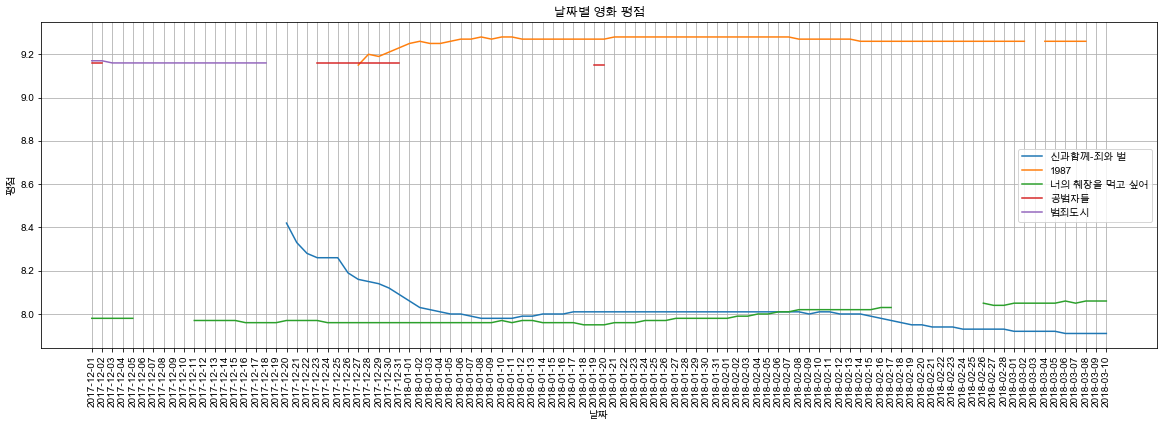

In [29]:
target_col = ['신과함께-죄와 벌', '1987', '너의 췌장을 먹고 싶어', '공범자들', '범죄도시']
plt.figure(figsize=(20,6))
plt.title('날짜별 영화 평점')
plt.xlabel('날짜')
plt.ylabel('평점')
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.tick_params(bottom='off', labelbottom='off')
# plt.tick_params(direction='out', length=6, width=2, colors='r',
#                grid_color='r', grid_alpha=0.5)
plt.show()